# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm
import cv2

In [2]:
train_path = 'Train/'
test_path = 'Test/'

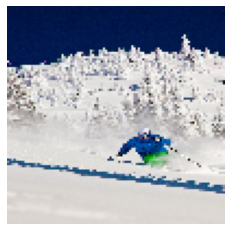

In [3]:
img = load_img(train_path + "ALPINE SKIING/001.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()


# Data Loading and Pre-processing

In [13]:
images = ['ALPINE SKIING', 'ARCHERY', 'ARTISTIC GYMNASTICS', 'ATHLETICS', 'BADMINTON','BASEBALL','BASKETBALL',
        'BEACH HANDBALL','BEACH VOLLEYBALL','BIATHLON','BOBSLEIGH','BOXING','BREAKING','CANOE FLATWATER','CANOE SLALOM',
        'CROSS-COUNTRY SKIING','CURLING','CYCLING BMX FREESTYLE','CYCLING BMX RACING','CYCLING MOUNTAIN BIKE',
        'CYCLING ROAD','CYCLING TRACK','DIVING','EQUESTRIAN','FENCING','FIGURE SKATING','FOOTBALL','FUTSAL','GOLF',
        'HANDBALL','HOCKEY','ICE HOCKEY','JUDO','KARATE','LUGE','MARATHON SWIMMING','MODERN PENTATHLON','NORDIC COMBINED',
        'RHYTHMIC GYMNASTICS','ROWING','RUGBY','SAILING','SHOOTING','SKATEBOARDING','SKELETON','SKI JUMPING','SKI MOUNTAINEERING',
        'SNOW BOARDING','SPEED SKATING','SPORT CLIMBING','SURFING','SWIMMING','TABLE TENNIS','TAEKWONDO','TENNIS',
        'TRAMPOLINE','TRIATHLON','VOLLEYBALL','WATER POLO','WEIGHTLIFTING','WRESTLING']
code = {'ALPINE SKIING':0, 'ARCHERY':1, 'ARTISTIC GYMNASTICS':2, 'ATHLETICS':3, 'BADMINTON':4,'BASEBALL':5,'BASKETBALL':6,
               'BEACH HANDBALL':7,'BEACH VOLLEYBALL':8,'BIATHLON':9,'BOBSLEIGH':10,'BOXING':11,'BREAKING':12,'CANOE FLATWATER':13,'CANOE SLALOM':14,
               'CROSS-COUNTRY SKIING':15,'CURLING':16,'CYCLING BMX FREESTYLE':17,'CYCLING BMX RACING':18,'CYCLING MOUNTAIN BIKE':19,
               'CYCLING ROAD':20,'CYCLING TRACK':21,'DIVING':22,'EQUESTRIAN':23,'FENCING':24,'FIGURE SKATING':25,'FOOTBALL':26,'FUTSAL':27,'GOLF':28,
               'HANDBALL':29,'HOCKEY':30,'ICE HOCKEY':31,'JUDO':32,'KARATE':33,'LUGE':34,'MARATHON SWIMMING':35,'MODERN PENTATHLON':36,'NORDIC COMBINED':37,
               'RHYTHMIC GYMNASTICS':38,'ROWING':39,'RUGBY':40,'SAILING':41,'SHOOTING':42,'SKATEBOARDING':43,'SKELETON':44,'SKI JUMPING':45,'SKI MOUNTAINEERING':46,
               'SNOW BOARDING':47,'SPEED SKATING':48,'SPORT CLIMBING':49,'SURFING':50,'SWIMMING':51,'TABLE TENNIS':52,'TAEKWONDO':53,'TENNIS':54,
               'TRAMPOLINE':55,'TRIATHLON':56,'VOLLEYBALL':57,'WATER POLO':58,'WEIGHTLIFTING':59,'WRESTLING':60}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [9]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [10]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

61


In [11]:
X_train = []
y_train = []
for folder in  os.listdir(train_path) : 
    
    for file in tqdm(os.listdir(os.path.join(train_path, folder))):
                
        # Get the path name of the image
        img_path = os.path.join(os.path.join(train_path, folder), file)

        # Open and resize the img
        image = cv2.imread(img_path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_array = cv2.resize(image, (100,100)) 
                
        X_train.append(list(image_array))
        y_train.append(code[folder])
        

100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [00:01<00:00, 59.61it/s]


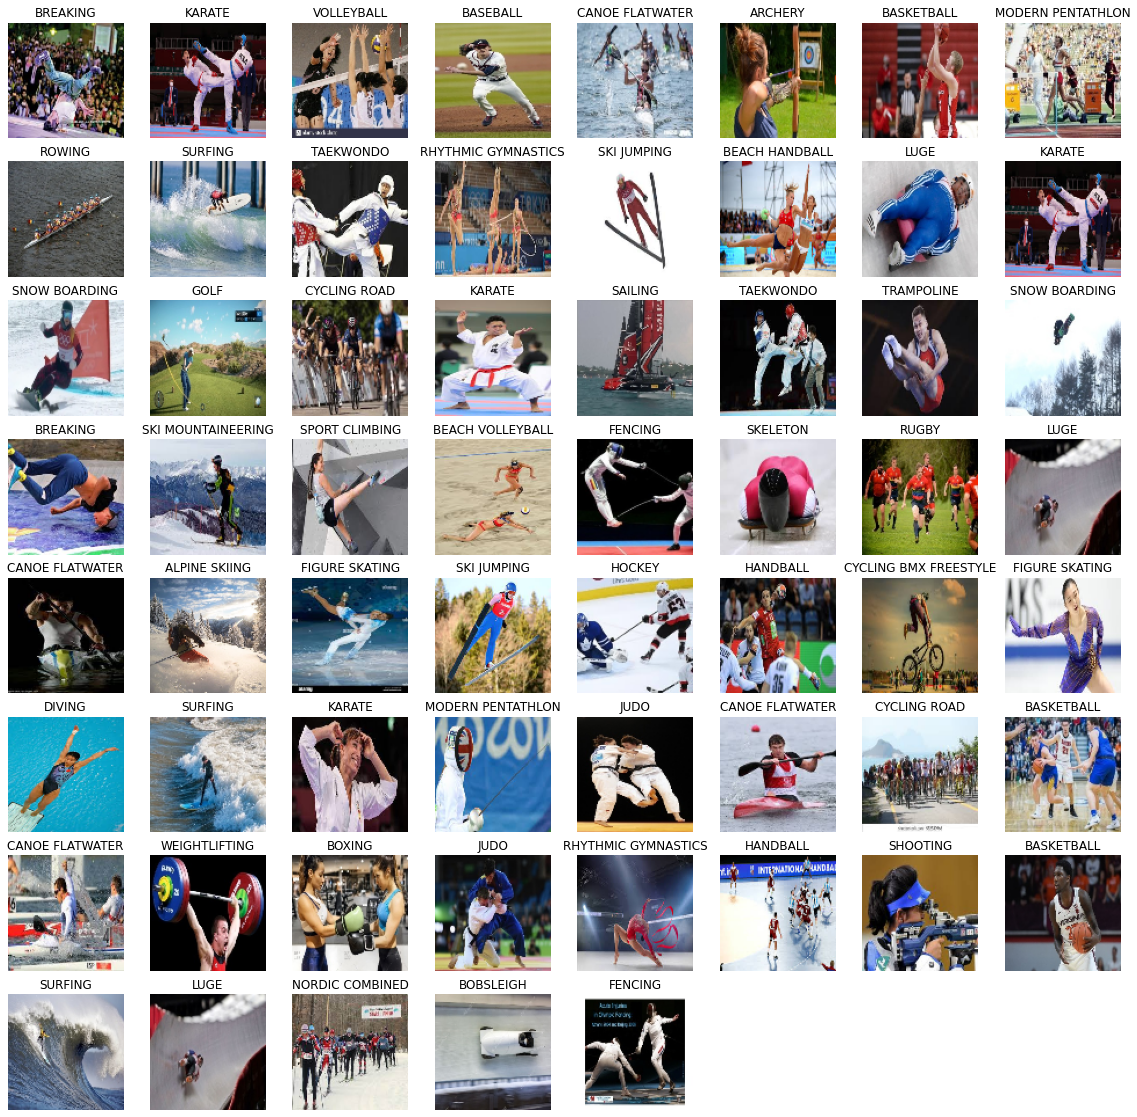

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),61))) : 
    plt.subplot(8,8,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

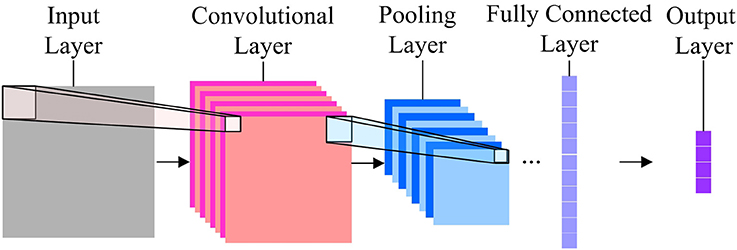

# Cnn Model

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))


In [16]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [18]:
batch_size = 32

# Data Augmentation

* rescale ----> rescaling factor. Defaults to None.
* shear_range ----> 'Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles.
* horizontal_flip ----> Boolean. Randomly flip inputs horizontally.
* vertical_flip ----> Boolean. Randomly flip inputs vertically.
* zoom_range ----> Float or [lower, upper]. Range for random zoom

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 7011 images belonging to 61 classes.
Found 1319 images belonging to 61 classes.


Epoch 1/50


<ipython-input-21-d75609086703>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


50/50 [==============================] - 14s 275ms/step - loss: 1.1772 - accuracy: 0.6794 - val_loss: 4.1591 - val_accuracy: 0.3887
Epoch 2/50
50/50 [==============================] - 14s 280ms/step - loss: 1.1495 - accuracy: 0.6850 - val_loss: 2.6592 - val_accuracy: 0.4800
Epoch 3/50
50/50 [==============================] - 14s 287ms/step - loss: 1.1262 - accuracy: 0.6994 - val_loss: 2.9568 - val_accuracy: 0.4487
Epoch 4/50
50/50 [==============================] - 14s 284ms/step - loss: 1.1497 - accuracy: 0.6785 - val_loss: 3.7463 - val_accuracy: 0.3625
Epoch 5/50
50/50 [==============================] - 16s 315ms/step - loss: 1.1850 - accuracy: 0.6988 - val_loss: 4.0299 - val_accuracy: 0.4363
Epoch 6/50
50/50 [==============================] - 16s 316ms/step - loss: 1.0857 - accuracy: 0.7034 - val_loss: 3.0065 - val_accuracy: 0.4963
Epoch 7/50
50/50 [==============================] - 16s 320ms/step - loss: 1.1180 - accuracy: 0.6900 - val_loss: 2.9547 - val_accuracy: 0.4588
Epoch 8/50

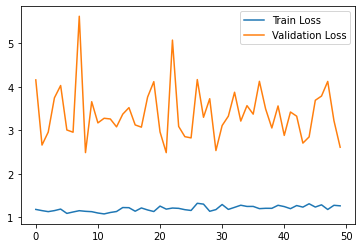

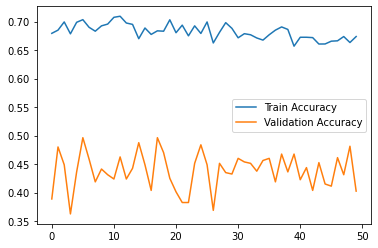

Epoch 1/100
50/50 [==============================] - 15s 293ms/step - loss: 1.2388 - accuracy: 0.6800 - val_loss: 4.1351 - val_accuracy: 0.4150
Epoch 2/100
50/50 [==============================] - 15s 293ms/step - loss: 1.2379 - accuracy: 0.6831 - val_loss: 3.9548 - val_accuracy: 0.3625
Epoch 3/100
50/50 [==============================] - 14s 279ms/step - loss: 1.2841 - accuracy: 0.6725 - val_loss: 3.2939 - val_accuracy: 0.4300
Epoch 4/100
50/50 [==============================] - 14s 278ms/step - loss: 1.1552 - accuracy: 0.6825 - val_loss: 2.6472 - val_accuracy: 0.4500
Epoch 5/100
50/50 [==============================] - 14s 285ms/step - loss: 1.2657 - accuracy: 0.6756 - val_loss: 2.7370 - val_accuracy: 0.4338
Epoch 6/100
50/50 [==============================] - 15s 301ms/step - loss: 1.2354 - accuracy: 0.6794 - val_loss: 2.6753 - val_accuracy: 0.4288
Epoch 7/100
50/50 [==============================] - 15s 299ms/step - loss: 1.1855 - accuracy: 0.6862 - val_loss: 2.8013 - val_accuracy:

50/50 [==============================] - 15s 294ms/step - loss: 1.3808 - accuracy: 0.6538 - val_loss: 4.4680 - val_accuracy: 0.4325
Epoch 58/100
50/50 [==============================] - 15s 292ms/step - loss: 1.3577 - accuracy: 0.6513 - val_loss: 3.6086 - val_accuracy: 0.4688
Epoch 59/100
50/50 [==============================] - 14s 287ms/step - loss: 1.4111 - accuracy: 0.6372 - val_loss: 3.7468 - val_accuracy: 0.4913
Epoch 60/100
50/50 [==============================] - 15s 308ms/step - loss: 1.2357 - accuracy: 0.6862 - val_loss: 3.9054 - val_accuracy: 0.4538
Epoch 61/100
50/50 [==============================] - 14s 289ms/step - loss: 1.3522 - accuracy: 0.6582 - val_loss: 3.7674 - val_accuracy: 0.4437
Epoch 62/100
50/50 [==============================] - 14s 288ms/step - loss: 1.3250 - accuracy: 0.6562 - val_loss: 3.5530 - val_accuracy: 0.4725
Epoch 63/100
50/50 [==============================] - 15s 299ms/step - loss: 1.4847 - accuracy: 0.6162 - val_loss: 3.7278 - val_accuracy: 0.367

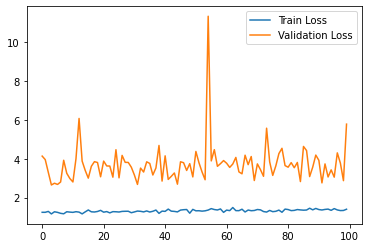

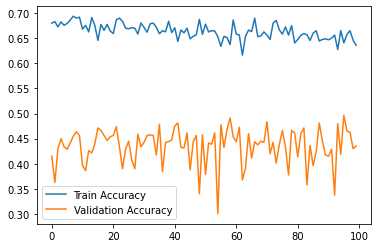

Epoch 1/150
50/50 [==============================] - 16s 311ms/step - loss: 1.4017 - accuracy: 0.6425 - val_loss: 2.8329 - val_accuracy: 0.4350
Epoch 2/150
50/50 [==============================] - 16s 314ms/step - loss: 1.3620 - accuracy: 0.6531 - val_loss: 5.1833 - val_accuracy: 0.4387
Epoch 3/150
50/50 [==============================] - 14s 287ms/step - loss: 1.3899 - accuracy: 0.6612 - val_loss: 2.8245 - val_accuracy: 0.4200
Epoch 4/150
50/50 [==============================] - 16s 321ms/step - loss: 1.4256 - accuracy: 0.6340 - val_loss: 3.4041 - val_accuracy: 0.4125
Epoch 5/150
50/50 [==============================] - 15s 296ms/step - loss: 1.3556 - accuracy: 0.6481 - val_loss: 3.5777 - val_accuracy: 0.4100
Epoch 6/150
50/50 [==============================] - 15s 302ms/step - loss: 1.3822 - accuracy: 0.6475 - val_loss: 4.4442 - val_accuracy: 0.4613
Epoch 7/150
50/50 [==============================] - 15s 300ms/step - loss: 1.4301 - accuracy: 0.6563 - val_loss: 3.1242 - val_accuracy:

50/50 [==============================] - 15s 299ms/step - loss: 1.5490 - accuracy: 0.6263 - val_loss: 3.1882 - val_accuracy: 0.4087
Epoch 58/150
50/50 [==============================] - 16s 323ms/step - loss: 1.6065 - accuracy: 0.6117 - val_loss: 4.4785 - val_accuracy: 0.4137
Epoch 59/150
50/50 [==============================] - 15s 296ms/step - loss: 1.4477 - accuracy: 0.6519 - val_loss: 4.0168 - val_accuracy: 0.4412
Epoch 60/150
50/50 [==============================] - 15s 306ms/step - loss: 1.5469 - accuracy: 0.6219 - val_loss: 3.5279 - val_accuracy: 0.4363
Epoch 61/150
50/50 [==============================] - 14s 284ms/step - loss: 1.5082 - accuracy: 0.6450 - val_loss: 4.8447 - val_accuracy: 0.3975
Epoch 62/150
50/50 [==============================] - 15s 298ms/step - loss: 1.5498 - accuracy: 0.6144 - val_loss: 2.8961 - val_accuracy: 0.3787
Epoch 63/150
50/50 [==============================] - 15s 297ms/step - loss: 1.5568 - accuracy: 0.6187 - val_loss: 3.4319 - val_accuracy: 0.422

50/50 [==============================] - 15s 300ms/step - loss: 1.6338 - accuracy: 0.6081 - val_loss: 4.3368 - val_accuracy: 0.4400
Epoch 114/150
50/50 [==============================] - 15s 302ms/step - loss: 2.0463 - accuracy: 0.5163 - val_loss: 2.9523 - val_accuracy: 0.3688
Epoch 115/150
50/50 [==============================] - 15s 298ms/step - loss: 1.8087 - accuracy: 0.5487 - val_loss: 2.8443 - val_accuracy: 0.3613
Epoch 116/150
50/50 [==============================] - 15s 291ms/step - loss: 1.9629 - accuracy: 0.5475 - val_loss: 3.3873 - val_accuracy: 0.4288
Epoch 117/150
50/50 [==============================] - 15s 299ms/step - loss: 1.8242 - accuracy: 0.5706 - val_loss: 2.9005 - val_accuracy: 0.4175
Epoch 118/150
50/50 [==============================] - 14s 287ms/step - loss: 1.7286 - accuracy: 0.5881 - val_loss: 3.3618 - val_accuracy: 0.3850
Epoch 119/150
50/50 [==============================] - 15s 304ms/step - loss: 2.0256 - accuracy: 0.5589 - val_loss: 4.5104 - val_accuracy:

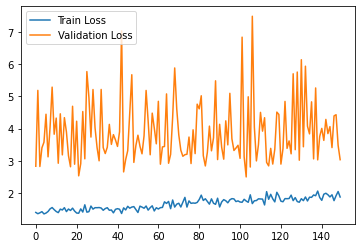

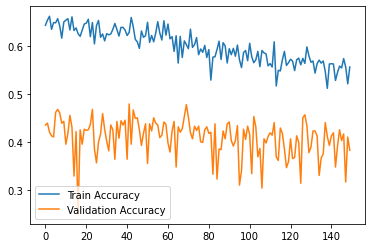

Epoch 1/200
50/50 [==============================] - 15s 299ms/step - loss: 1.9136 - accuracy: 0.5387 - val_loss: 5.0164 - val_accuracy: 0.3625
Epoch 2/200
50/50 [==============================] - 16s 312ms/step - loss: 2.2077 - accuracy: 0.4990 - val_loss: 3.7672 - val_accuracy: 0.4200
Epoch 3/200
50/50 [==============================] - 15s 292ms/step - loss: 2.0095 - accuracy: 0.5269 - val_loss: 3.5234 - val_accuracy: 0.3925
Epoch 4/200
50/50 [==============================] - 15s 303ms/step - loss: 2.0659 - accuracy: 0.5281 - val_loss: 2.8946 - val_accuracy: 0.3187
Epoch 5/200
50/50 [==============================] - 16s 322ms/step - loss: 1.9031 - accuracy: 0.5556 - val_loss: 2.7852 - val_accuracy: 0.3237
Epoch 6/200
50/50 [==============================] - 15s 306ms/step - loss: 2.2573 - accuracy: 0.4876 - val_loss: 4.9745 - val_accuracy: 0.4275
Epoch 7/200
50/50 [==============================] - 16s 318ms/step - loss: 2.1540 - accuracy: 0.5181 - val_loss: 3.1103 - val_accuracy:

50/50 [==============================] - 15s 292ms/step - loss: 2.2816 - accuracy: 0.4539 - val_loss: 5.1701 - val_accuracy: 0.4050
Epoch 58/200
50/50 [==============================] - 15s 304ms/step - loss: 2.3644 - accuracy: 0.4700 - val_loss: 6.4233 - val_accuracy: 0.3625
Epoch 59/200
50/50 [==============================] - 15s 297ms/step - loss: 2.2892 - accuracy: 0.4750 - val_loss: 3.7630 - val_accuracy: 0.3887
Epoch 60/200
50/50 [==============================] - 15s 299ms/step - loss: 2.2620 - accuracy: 0.4914 - val_loss: 3.0053 - val_accuracy: 0.2750
Epoch 61/200
50/50 [==============================] - 14s 281ms/step - loss: 2.3637 - accuracy: 0.4538 - val_loss: 4.6941 - val_accuracy: 0.3688
Epoch 62/200
50/50 [==============================] - 15s 299ms/step - loss: 2.2406 - accuracy: 0.4881 - val_loss: 3.1399 - val_accuracy: 0.3288
Epoch 63/200
50/50 [==============================] - 15s 288ms/step - loss: 2.2028 - accuracy: 0.4825 - val_loss: 4.3232 - val_accuracy: 0.373

50/50 [==============================] - 17s 343ms/step - loss: 2.5697 - accuracy: 0.4044 - val_loss: 3.7429 - val_accuracy: 0.3562
Epoch 114/200
50/50 [==============================] - 16s 315ms/step - loss: 2.6833 - accuracy: 0.4080 - val_loss: 4.1134 - val_accuracy: 0.2700
Epoch 115/200
50/50 [==============================] - 16s 326ms/step - loss: 2.6334 - accuracy: 0.3850 - val_loss: 3.8988 - val_accuracy: 0.4288
Epoch 116/200
50/50 [==============================] - 16s 325ms/step - loss: 2.8442 - accuracy: 0.3644 - val_loss: 3.8008 - val_accuracy: 0.3200
Epoch 117/200
50/50 [==============================] - 15s 297ms/step - loss: 2.6267 - accuracy: 0.3756 - val_loss: 3.8130 - val_accuracy: 0.3137
Epoch 118/200
50/50 [==============================] - 15s 300ms/step - loss: 2.6803 - accuracy: 0.3994 - val_loss: 3.6261 - val_accuracy: 0.3600
Epoch 119/200
50/50 [==============================] - 16s 319ms/step - loss: 2.8469 - accuracy: 0.4006 - val_loss: 3.1254 - val_accuracy:

50/50 [==============================] - 29s 571ms/step - loss: 2.8105 - accuracy: 0.3575 - val_loss: 3.6362 - val_accuracy: 0.3363
Epoch 170/200
50/50 [==============================] - 28s 549ms/step - loss: 2.7684 - accuracy: 0.3769 - val_loss: 4.9815 - val_accuracy: 0.3587
Epoch 171/200
50/50 [==============================] - 27s 533ms/step - loss: 2.7755 - accuracy: 0.3613 - val_loss: 4.0956 - val_accuracy: 0.3738
Epoch 172/200
50/50 [==============================] - 30s 590ms/step - loss: 2.7899 - accuracy: 0.3550 - val_loss: 3.3199 - val_accuracy: 0.2100
Epoch 173/200
50/50 [==============================] - 27s 539ms/step - loss: 2.7660 - accuracy: 0.3306 - val_loss: 7.8319 - val_accuracy: 0.3050
Epoch 174/200
50/50 [==============================] - 28s 551ms/step - loss: 2.8291 - accuracy: 0.3638 - val_loss: 3.8828 - val_accuracy: 0.1550
Epoch 175/200
50/50 [==============================] - 30s 594ms/step - loss: 2.9205 - accuracy: 0.3294 - val_loss: 3.9812 - val_accuracy:

In [ ]:
for ep in range(50,300,50):
    hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = ep,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)
    plt.plot(hist.history["loss"], label = "Train Loss")
    plt.plot(hist.history["val_loss"], label = "Validation Loss")
    plt.legend()
    plt.show()
    plt.plot(hist.history["accuracy"], label = "Train Accuracy")
    plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
    plt.legend()
    plt.show()

In [42]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)

<ipython-input-42-3415c695154e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/50
50/50 [==============================] - 53s 1s/step - loss: 4.1107 - accuracy: 0.0350 - val_loss: 4.0406 - val_accuracy: 0.0350
Epoch 2/50
50/50 [==============================] - 39s 776ms/step - loss: 3.9560 - accuracy: 0.0494 - val_loss: 3.7779 - val_accuracy: 0.0600
Epoch 3/50
50/50 [==============================] - 29s 583ms/step - loss: 3.7807 - accuracy: 0.0764 - val_loss: 3.6697 - val_accuracy: 0.0938
Epoch 4/50
50/50 [==============================] - 24s 487ms/step - loss: 3.6193 - accuracy: 0.0987 - val_loss: 3.4777 - val_accuracy: 0.1163
Epoch 5/50
50/50 [==============================] - 22s 432ms/step - loss: 3.4425 - accuracy: 0.1269 - val_loss: 3.3646 - val_accuracy: 0.1550
Epoch 6/50
50/50 [==============================] - 19s 386ms/step - loss: 3.3500 - accuracy: 0.1513 - val_loss: 3.1099 - val_accuracy: 0.1963
Epoch 7/50
50/50 [==============================] - 18s 358ms/step - loss: 3.2396 - accuracy: 0.1744 - val_loss: 3.2239 - val_accuracy: 0.1650
Ep

In [16]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Train-Validation Loss

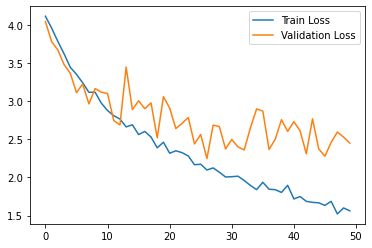

In [43]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# Train-Validation Accuracy

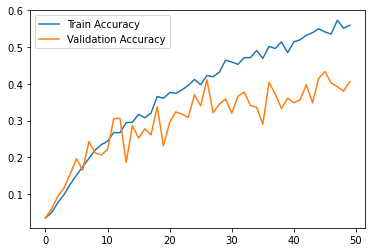

In [44]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()